# Acessando base de dados do BC (Banco Central)

## 1 - Importando as ferramentas

In [30]:
#https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
#https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
#pd.options.display.float_format = '{:.6f}'.format


## 2 - Coletando os dados

In [23]:
def consulta_bc(cod):
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(cod)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data',inplace=True)
    return df

In [25]:
cod = '433'
ipca = consulta_bc(cod)

In [26]:
cod = 189
igpm = consulta_bc(cod)

In [27]:
cod = 432
selic = consulta_bc(cod)

In [28]:
cod = 13621
reserva_int = consulta_bc(cod)

In [29]:
cod = 24369
pnad = consulta_bc(cod)

In [42]:
cod = 12
cdi_d = consulta_bc(cod)

In [32]:
ibov = yf.download(tickers='^BVSP')[['Close']]

[*********************100%***********************]  1 of 1 completed


## 2 - Tratando os dados

In [50]:
data_inicio = '2022-01-01'

In [51]:
ibov_retorno = ibov.pct_change()
ibov_retorno_acum = (ibov_retorno[ibov_retorno.index >= data_inicio] + 1).cumprod()
ibov_retorno_acum.iloc[0] = 1

In [52]:
cdi_acum = (1 + cdi_d[cdi_d.index >= data_inicio] / 100).cumprod()
cdi_acum.iloc[0] = 1

## 3 - Visualizando os dados

### IBOV acumulado x CDI Acumulado

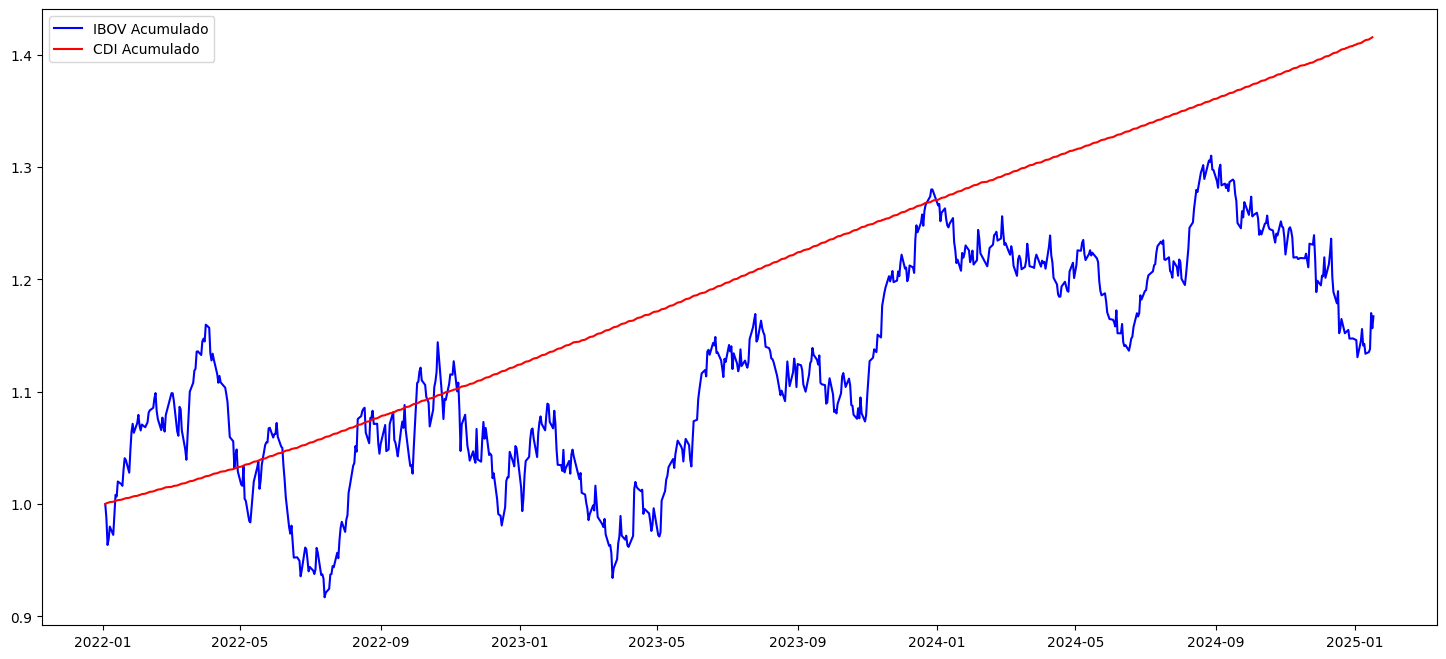

In [54]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(ibov_retorno_acum, color='blue', label='IBOV Acumulado')
ax.plot(cdi_acum, color='red', label='CDI Acumulado')

ax.legend()

plt.show()